In [1]:
# coding=utf-8

import xlrd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates
import numpy as np
from scipy.interpolate import spline
from pandas.plotting import register_matplotlib_converters
from PIL import Image


file_dir = r"C:\Users\A\Desktop\Classification\my_data\png/"

#读取excel文件
Excelfile=xlrd.open_workbook(r'C:\Users\A\Desktop\Classification\test.xlsx')

#获取读入文件的sheet
#索引从0开始
#也可以用名字的方式读取，但是一定要注意大小写
#sheet = Excelfile.sheet_by_name('Sheet1')
sheet = Excelfile.sheet_by_index(0)


row_count=sheet.nrows#获取行数，列数ncols
#print(row_count)

#设置画图x时间轴，5.5秒为时间间隔
x=[0,5.5,11,16.5,22,27.5,33,38.5]
#print(x)

xnew = np.linspace(0,38.5,300)


#获取行内容，索引从0开始
for i in range(0,row_count):
    rows=sheet.row_values(i)
    #print(rows)
    
    rows_smooth = spline(x,rows,xnew)
    
    
    fig=plt.figure()
    plt.plot(xnew, rows_smooth, linestyle='solid', marker='None')
    
    #不带平滑的图
    #plt.plot(x, rows, linestyle='solid', marker='None')
    plt.axis('off')
    plt.figure(figsize=(100,10))
    
    fig.savefig(file_dir  + str(i) + '.png', dpi=100)
    plt.show()

    
    


ModuleNotFoundError: No module named 'xlrd'

<function matplotlib.pyplot.show(*args, **kw)>

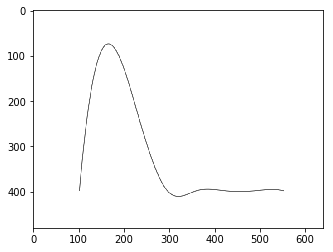

In [2]:
'''convert png to grayscale np arrays'''


'''Input Parameters'''

file_dir = r"C:\Users\A\Desktop\Classification\my_data\png/"
for j in range (0, row_count):
    filename = str(j)
    img = Image.open( file_dir+filename + '.png' ).convert('L')
    data = np.array(img, dtype='uint8' )
    np.save( file_dir+filename + '.npy', data)

# visually testing our output
img_array = np.load(file_dir+'1.npy')
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
plt.show